In [305]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</form>
""")

<img src="scribble-brain_black.png" style="width: 100px; float: left">

# Number of commits to AI repositories on GitHub
#### Description:
The number of commits (i.e. edits) to AI-related repositories (software) on GitHub made by a country's users in a given year.

#### Source:
GitHub API

#### Why it matters:
- GitHub is the largest code hosting platform in the world with more than 5m developers contributing across 10m repositories [1]
- It is used by developers to showcase their work to not just peers but potential employers - a developer's GitHub profile, which includes records of the edits they've made to software, acts as an effective resume
- Likewise, the AI code hosted on GitHub is usually open source, well documented and regularly maintained, providing a massive software library for AI academics, entrepreneurs and hobbyists
- Using the API provides fine-grain data on who is developing AI software and where they are from

#### Methodology:
1. Identify a set of AI-related topics on GitHub
2. Gather the repos that share these topics using the GitHub API (approx 6,000 repos)
3. For each repo, gather the list of commits, including the date of the commit and the user who made it (approx 400,000 commits)
4. For each user, gather their location from their profile
5. For each country, count the number of commits that country's developers have made to AI repos in a given year

#### Limitations:
- Only public repos. Unable to include private. Bias towards open source AI community.
- Reliance on users' own declaration of location on profile
- Bias towards English-speaking and Western countries
- No qualitative analysis of commits. Unclear how much of a genuine 'edit' a commit represents. Bias towards countries where developers are editing little but often.

#### References
1. <i>Lean GHTorrent: GitHub Data on Demand</i>, Gousios, Vasilescu, Serebrenik, Zaidman (2014) https://www.win.tue.nl/~aserebre/msr14georgios.pdf

-------------------
## Indicator and findings

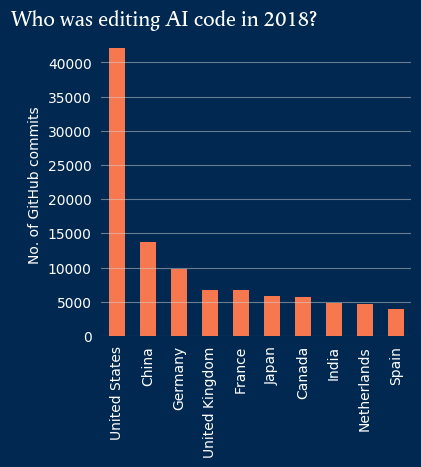

In [296]:
hide_me
from matplotlib import font_manager as fm, rcParams
prop = fm.FontProperties(fname='/Users/alexclark/Library/Fonts/WolpePegasus-Regular.ttf')
prop_min = fm.FontProperties(fname='/Users/alexclark/Library/Fonts/SourceSansPro-Regular.ttf')
with plt.rc_context({'axes.labelcolor': 'white', 'axes.edgecolor':'white', 'xtick.color':'white', 
                     'xtick.bottom': False, 'ytick.color':'white', 'ytick.left': False,
                     'axes.spines.bottom': False, 'axes.spines.left': False,
                     'axes.spines.right': False, 'axes.spines.top': False,
                     'figure.facecolor':'#002850', 'axes.facecolor': '#002850',
                    'figure.dpi': 100}):
    ax = df_edits_yearly.nlargest(10, '2018')['2018'].plot(kind='bar',figsize=(4, 4), color='#f7774f')
    ax.yaxis.grid(color='lightgrey', alpha=.5)
    plt.ylabel('No. of GitHub commits')
    ax.get_xaxis().get_label().set_visible(False)
    plt.title("Who was editing AI code in 2018?",
              x=.2, y=1, fontproperties=prop, fontsize=16, color='white')
    plt.show()

#### American developers are making the most edits

Users based in the United States made the most GitHub commits by a long shot last year. In fact, the US has come in first place by a substantial margin for every year in the dataset. This is perhaps a reflection of GitHub's own American origins. 

#### China on the rise

In 2018 for the first time Chinese developers made more commits to AI repositories than every individual European country. But China remains behind if Europe is taken as one bloc.

#### India's bigger but quieter stock of developers

Despite coming in third place behind the US and China in terms of sheer numbers of developers active on GitHub, India only came in eight place in our commit activity data. This does not necessarily mean India's coders are less active - it may just mean that they are more likely to be coding behind closed doors (i.e commiting to private repos).


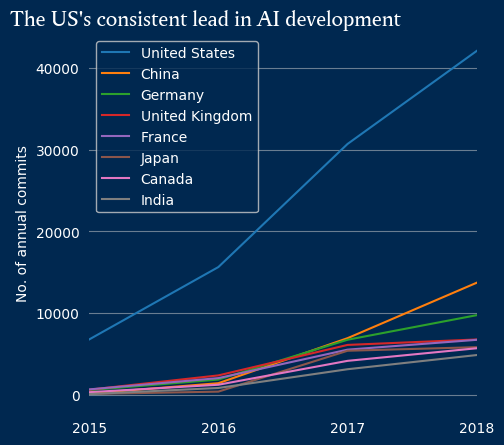

In [300]:
hide_me
prop = fm.FontProperties(fname='/Users/alexclark/Library/Fonts/WolpePegasus-Regular.ttf')
prop_min = fm.FontProperties(fname='/Users/alexclark/Library/Fonts/SourceSansPro-Regular.ttf')
with plt.rc_context({'axes.labelcolor': 'white', 'axes.edgecolor':'white', 'xtick.color':'white', 
                     'xtick.bottom': False, 'ytick.color':'white', 'ytick.left': False,
                     'axes.spines.bottom': False, 'axes.spines.left': False,
                     'axes.spines.right': False, 'axes.spines.top': False,
                     'figure.facecolor':'#002850', 'axes.facecolor': '#002850',
                    'figure.dpi': 100}):    
    ax = df_edits_yearly.nlargest(8, '2018')[['2015', '2016', '2017', '2018']].T.plot(figsize=(5, 5))
    ax.yaxis.grid(color='lightgrey', alpha=.5)
    ax.get_xaxis().get_label().set_visible(False)
    legend = plt.legend()
    plt.setp(legend.get_texts(), color='w')
    plt.ylabel('No. of annual commits')
    plt.title("The US's consistent lead in AI development", x=.3, y=1, fontproperties=prop, fontsize=16, color='white')
    plt.show()

#### Deepening activity in deep learning

Using GitHub data offers the opportunity to examine activity in particular subfields in AI on the basis of repository topics.

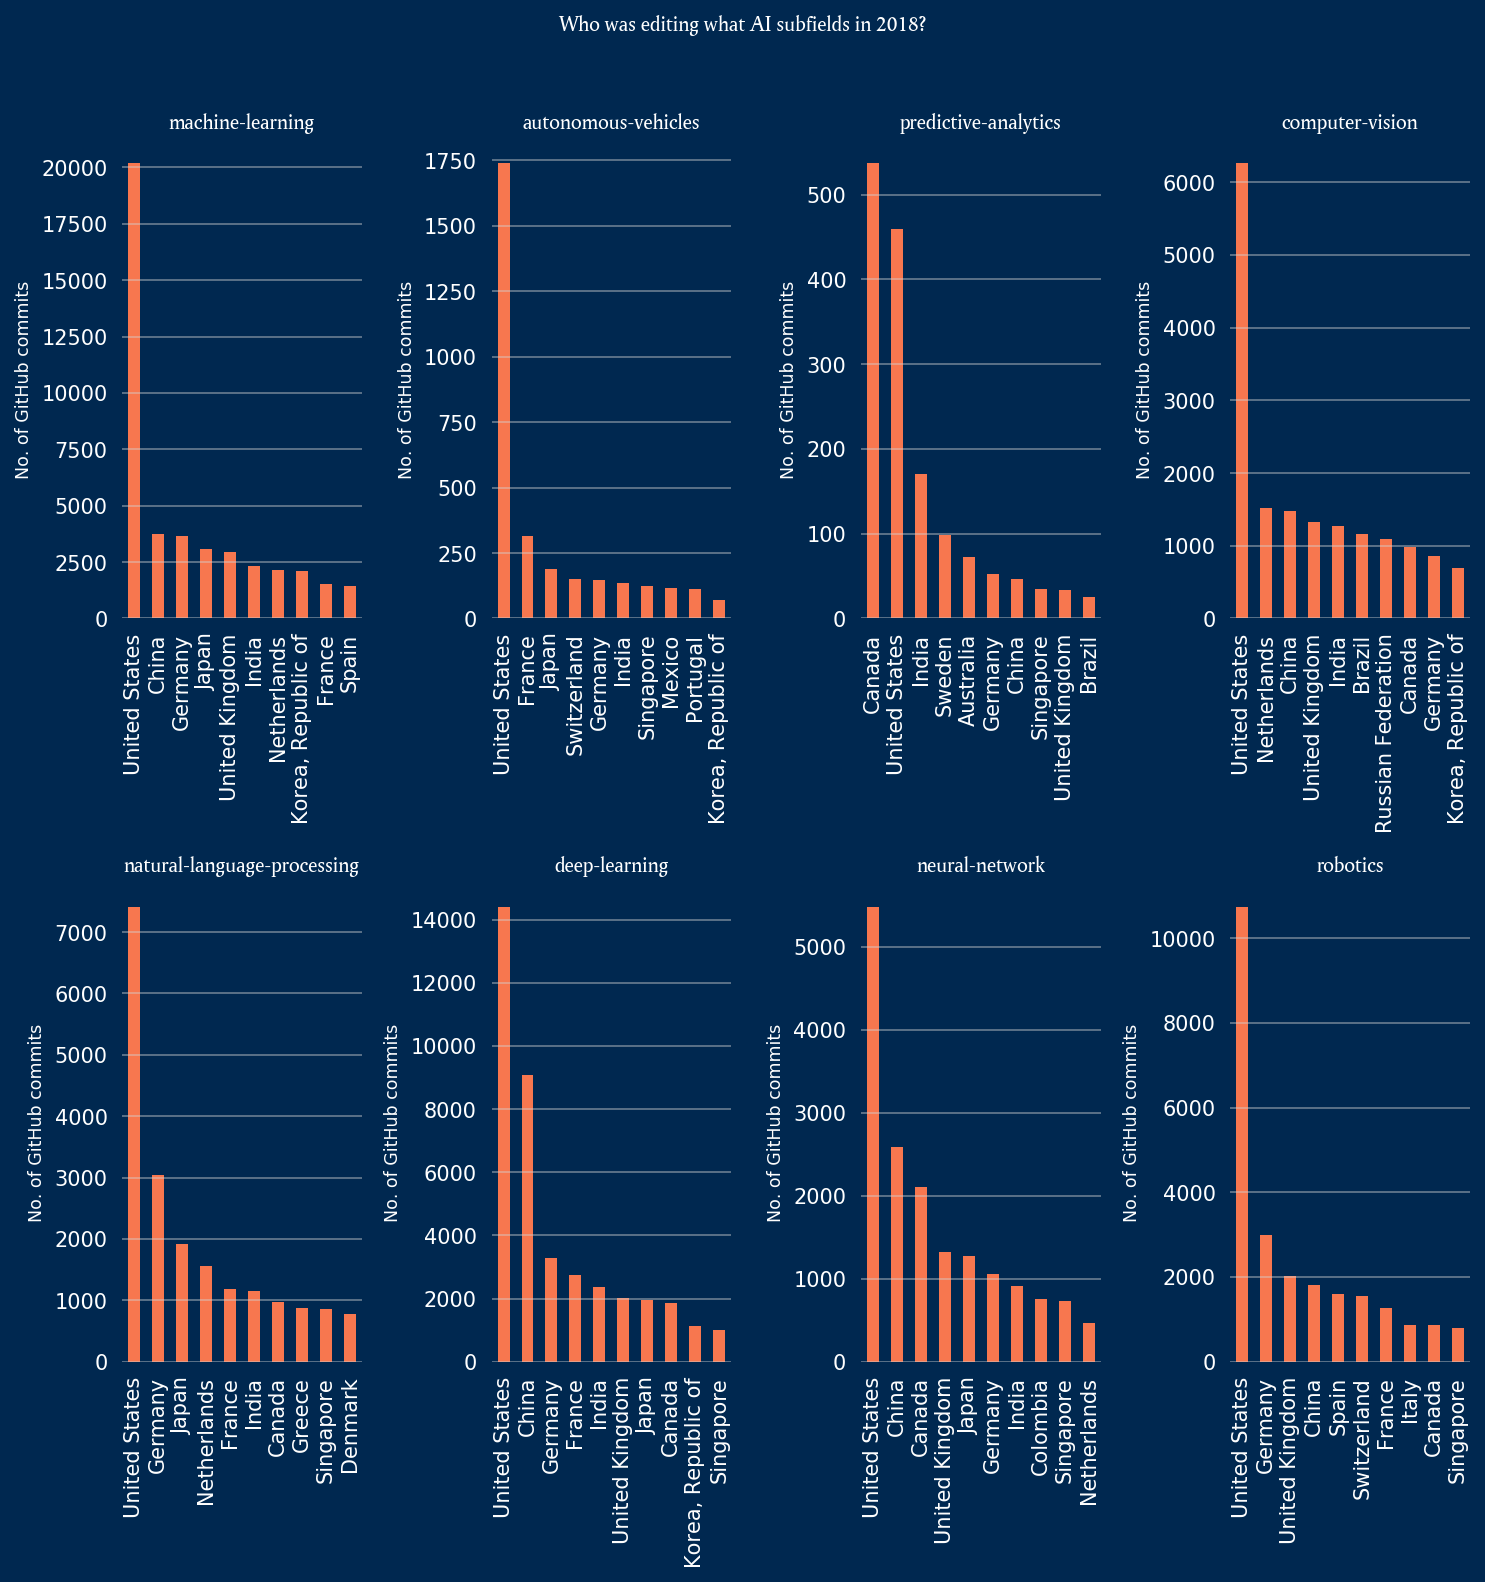

In [302]:
hide_me

# import matplotlib.pyplot as plt

with plt.rc_context({'axes.labelcolor': 'white', 'axes.edgecolor':'white', 'xtick.color':'white', 
                     'xtick.bottom': False, 'ytick.color':'white', 'ytick.left': False,
                     'axes.spines.bottom': False, 'axes.spines.left': False,
                     'axes.spines.right': False, 'axes.spines.top': False,
                     'axes.labelsize': 'small', 'axes.titlesize': 'small',
                     'figure.facecolor':'#002850', 'axes.facecolor': '#002850',
                    'figure.dpi': 150}):

    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,10))
    fig.suptitle('Who was editing what AI subfields in 2018?', va='top', color='white', fontsize=50, y=1.05, fontproperties=prop)
    i = 0
    j = 0

    for topic in ai_topics:
        if topic in ['artificial-intelligence', 'virtual-assistant', 'intelligent-systems']:
            continue
        df_topic = pd.DataFrame(df[df[topic] == 1].groupby(['year'])['country'].value_counts())
        df_topic_yearly = df_topic.loc[2019]
        df_topic_yearly = pd.DataFrame(df_topic_yearly.country)

        df_topic_yearly = df_topic_yearly.rename(columns={'country': '2019'})

        for year in range(2015, 2019):
            df_topic_add = df_topic.loc[year]
            df_topic_add = pd.DataFrame(df_topic_add.country)
            df_topic_add = df_topic_add.rename(columns={'country': str(year)})
            df_topic_yearly = df_topic_yearly.join(df_topic_add, on='country')

        df_topic_yearly = df_topic_yearly.drop(columns=['2019'])
        ax = df_topic_yearly.nlargest(10, '2018')['2018'].plot(ax=axs[i, j], kind='bar', color='#f7774f')
        ax.yaxis.grid(color='lightgrey', alpha=.5)
        ax.set_ylabel('No. of GitHub commits')
        ax.get_xaxis().get_label().set_visible(False)
        ax.set_title(topic, color='white', fontproperties=prop)
        
        
        
        
        if j == 3:
            j = 0
            i += 1
        else:
            j += 1

    plt.tight_layout()
    plt.show()

The United States leads in all subfields except predictive analytics, though Canada's first place position may be due to the smaller sample size of this subfield. Meanwhile in other fields, second place is often a tussle between China and a European country.

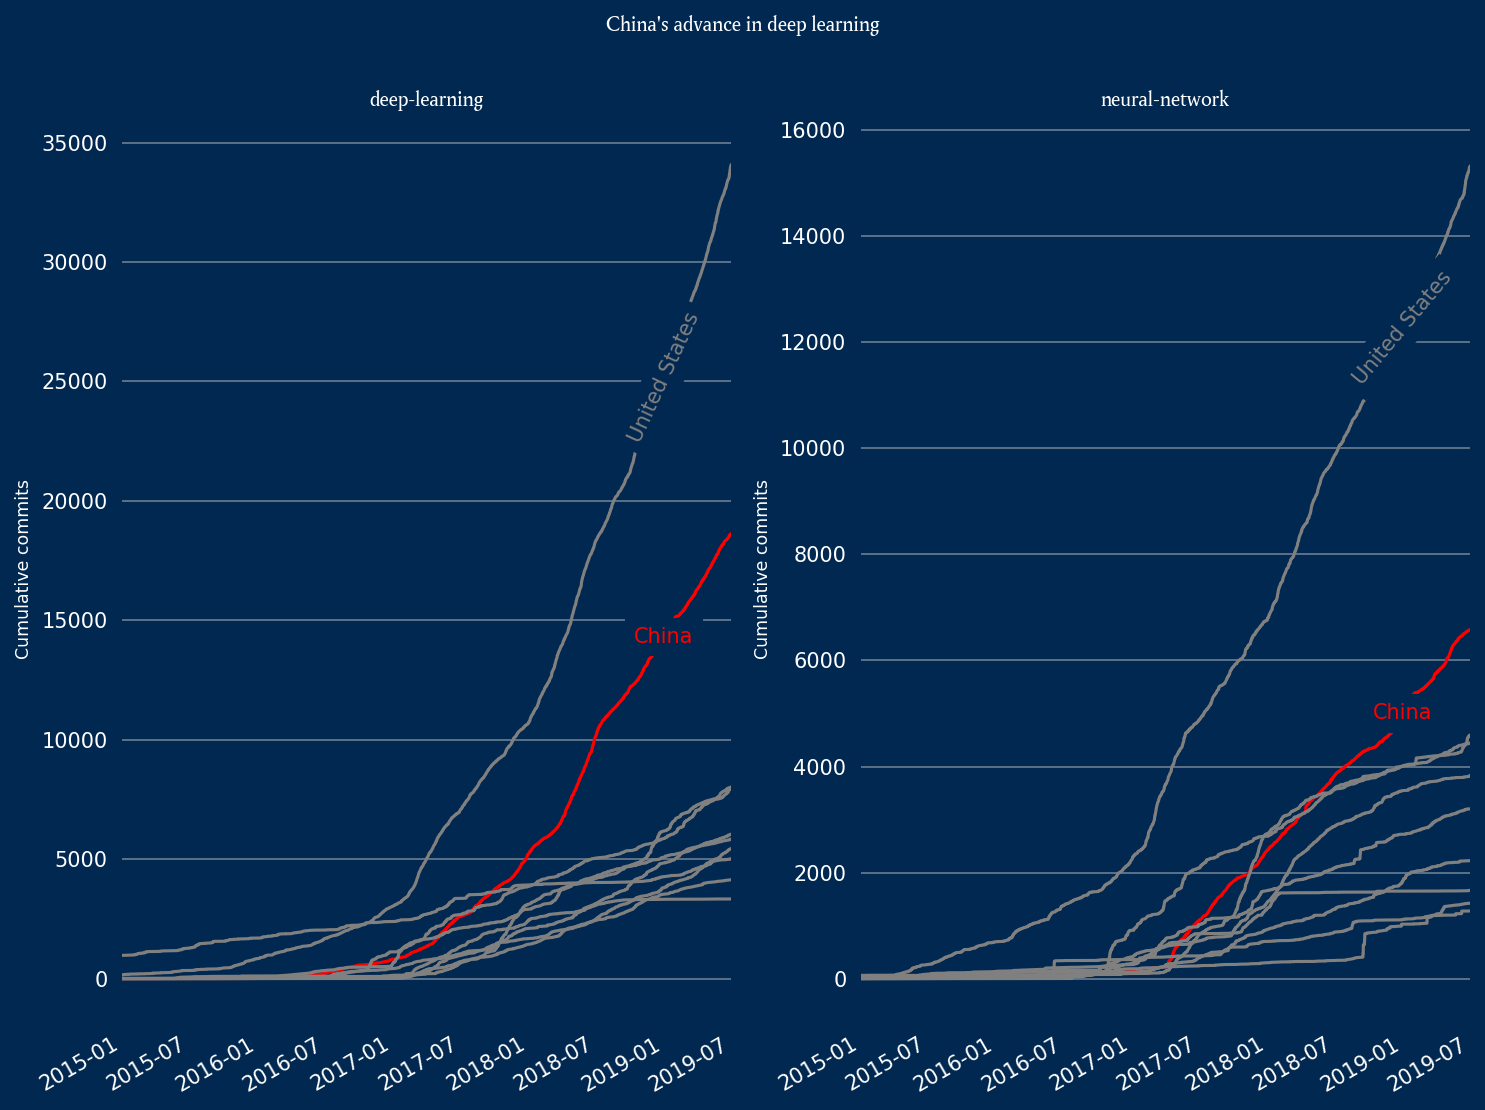

In [285]:
df['dt'] = pd.to_datetime(df['datetime'])

from labellines import labelLine, labelLines

with plt.rc_context({'axes.labelcolor': 'white', 'axes.edgecolor':'white', 'xtick.color':'white', 
                     'xtick.bottom': False, 'ytick.color':'white', 'ytick.left': False,
                     'axes.spines.bottom': False, 'axes.spines.left': False,
                     'axes.spines.right': False, 'axes.spines.top': False,
                     'axes.labelsize': 'small', 'axes.titlesize': 'small',
                     'figure.facecolor':'#002850', 'axes.facecolor': '#002850',
                    'figure.dpi': 150}):

    fig, axes = plt.subplots(ncols=2, figsize=(10, 7))
    fig.suptitle("China's advance in deep learning", fontsize=100, y=1.05, fontproperties=prop, color='white')
    i = 0
    j = 0
    for keyword in ['deep-learning', 'neural-network']:
        if keyword == 'artificial-intelligence':
            continue
        df_key = df[df[keyword] == 1].sort_values(by='dt')
        df_key = df_key.set_index('dt')
        df_key['country_cumcount'] = df_key.groupby('country').cumcount() + 1
        df_key = df_key.pivot_table(index='dt', columns='country', aggfunc='size', fill_value=0).reset_index()
        df_key = df_key.set_index('dt').cumsum()
        countries = df_key.T.nlargest(10, df_key.T.columns[-1]).index.values.tolist()
        ax1 = df_key[countries].plot(ax=axes[j], color=tuple(["grey", "r","grey","grey","grey", "grey", 'grey', 'grey', 'grey']))
        ax1.set_xlim(pd.Timestamp('2015-01-01'), pd.Timestamp('2019-07-01'))
        ax1.set_title(keyword, color='white', fontproperties=prop)
        ax1.get_legend().remove()
        labelLines(ax1.lines[1:2],zorder=2.5, xvals = [pd.Timestamp('2019-01-01')])
        labelLines(ax1.lines[0:1],zorder=2.5, xvals = [pd.Timestamp('2019-01-01')])
        ax1.yaxis.grid(color='lightgrey', alpha=.5)
        ax1.set_ylabel('Cumulative commits')
        ax1.get_xaxis().get_label().set_visible(False)
        if j == 4:
            j = 0
            i += 1
        else:
            j += 1
    plt.tight_layout()
    plt.show()

#### A borderless AI ecosystem?

Network analysis of the GitHub data suggests the AI development ecosystem is relatively borderless - at least online and within the open source community.

In the below network diagram, each of the 9,000 AI developers in our data is represented by an orange node. For each repository the developer has made a commit to, a line is drawn between the other developers who have also made a commit to that repository.

<img src="github_network2.png">

The diagram shows differences in the level of collaboration between AI developers. On the one hand, the 'nucleus' of the network consists of clusters of AI developers with many connections - presumably those working on the biggest AI projects. Around them orbit many more developers, unclustered with far fewer connections.

Two metrics of the network reflect this structure: firstly, a reasonably high clustering coefficient (0.62), which measures the extent to which the GitHub users form tightly knit groups. Secondly, a high degree assortativity coefficient (0.74), a measure of the extent to which a network's well connected users are attached to others that are well connected - and likewise for the poorly connected users.

However, the network's assortivity on the basis of developer countries is near zero (0.09). In other words, the network suggests developers on GitHub do not seem to have a preference for collaborating with developers from their own country. This result might be expected from data on a platform dominated by one language - English.

#### How it looked over time

Each blip on the below map represents a commit made to an AI-related package. The blips are located on the basis of the location of the user who made the commit.

<img src="commitsanimatedcropped.gif">

---------
## Data

The below table gives the total number of commits made by developers from a particular country in each year

In [288]:
df_edits_yearly

,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,
United States,76.0,294.0,292.0,647.0,2194.0,6774.0,15632.0,30694.0,42079.0
Germany,NaN,NaN,199.0,461.0,453.0,574.0,1866.0,6737.0,9744.0
China,NaN,NaN,NaN,1.0,18.0,144.0,1421.0,6929.0,13713.0
United Kingdom,NaN,NaN,NaN,NaN,110.0,625.0,2375.0,6104.0,6771.0
France,NaN,92.0,114.0,45.0,124.0,661.0,2042.0,5524.0,6729.0
Switzerland,NaN,NaN,NaN,469.0,1329.0,1492.0,1179.0,2832.0,2526.0
Spain,NaN,NaN,NaN,60.0,64.0,205.0,582.0,1645.0,3921.0
Japan,NaN,42.0,32.0,67.0,190.0,101.0,388.0,5391.0,5828.0
India,4.0,NaN,NaN,1.0,1.0,84.0,835.0,3129.0,4864.0


----------
## Code 

In [307]:
HTML("""The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</form>""")

The below code block imports the data we have gathered from the GitHub API as well as the list of keywords we have used to identify AI-related repositories. 

Each row of the original dataset represents a commit, with columns including the date of the commit, the user making the commit and where this user is based. 

The data is then cleaned - i.e. users without a country value are dropped - and afterwards we count the number of occurences of each country.

In [8]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

ai_topics = ['artificial-intelligence', 'machine-learning', 'autonomous-vehicles', 'predictive-analytics', 'computer-vision', 'natural-language-processing', 'intelligent-systems', 'virtual-assistant', 'deep-learning', 'neural-network', 'robotics']

data = []

with open('github_ai_commits_country.csv', 'r') as fp:
    reader = csv.DictReader(fp)
    for row in reader:
        data.append(row)
        
df = pd.DataFrame(data)

for topic in ai_topics:
    df[topic] = pd.to_numeric(df[topic])
    
df['country'] = df['country'].replace('', np.nan)

df = df.dropna()

df['year'] = pd.to_datetime(df.datetime).dt.year

df_edits_per_year = pd.DataFrame(df.groupby(['year'])['country'].value_counts())

df_edits_yearly = df_edits_per_year.loc[2019]

df_edits_yearly = pd.DataFrame(df_edits_yearly.country)

df_edits_yearly = df_edits_yearly.rename(columns={'country': '2019'})

for year in range(2010, 2019):
    df_edits_add = df_edits_per_year.loc[year]
    df_edits_add = pd.DataFrame(df_edits_add.country)
    df_edits_add = df_edits_add.rename(columns={'country': str(year)})
    df_edits_yearly = df_edits_yearly.join(df_edits_add, on='country')

df_edits_yearly = df_edits_yearly.drop(columns=['2019'])